## 다음 뉴스 유사도 (코사인 유사도)
- https://wikidocs.net/159030

In [16]:
import requests
from bs4 import BeautifulSoup
import konlpy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
#Window 의 한글 폰트 설정
#plt.rc('font', family='Malgun Gothic')
#Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')
import seaborn as sns

In [17]:
def detail_info(url):
    res = requests.get(url)

    #

    text = res.text
    #print(text)

    soup = BeautifulSoup(text,'html.parser')

    title = soup.select_one('#cSub > div > h3').text.strip()

    if soup.select('#cSub > div > span > span') and len(soup.select('#cSub > div > span > span')) > 1:
        date = soup.select('#cSub > div > span > span')[1].text.replace('입력 ', '')
    else:
        date = ''

    contents = soup.select_one('#harmonyContainer > section').text.strip()

    return title, date, contents

In [18]:
title, date, contents = detail_info('http://v.media.daum.net/v/20180613160505065')
print(title) # 제목
print(date) # 날짜
print(contents) # 내용

여러 약 복용하면 우울감 높일 수 있다
2018. 06. 13. 16:05
여러 약물을 복용하는 사람은 우울증이나 자살 충동 등 부작용 위험이 높다는 연구 결과가 나와 의약품 복용에 주의가 필요해 보인다.
일리노이 약학대학 디마 마젠 카토 교수팀이 여러 약을 복용하는 미국인 세 명 중 한 명은 약의 부작용으로 우울증을 앓을 수 있다고 경고했다.
카토 교수팀은 미국 국립건강영양조사(2005~2014년)의 자료를 수집해, 약물 복용 현황과 우울증ㆍ자살 충동 등의 위험을 조사했다. 그 결과, 우울증 관련 처방 약품 중 3종류 이상을 복용하는 사람이 2005년 7%에서 2014년 10%로 늘었다고 확인됐다. 또한, 자살 충동의 부작용을 일으킬 수 있는 약품의 사용도 10년 만에 17%에서 24%로 늘었다.
이번 조사를 통해 카토 교수는 여러 약품을 복용하는 성인 중 우울증으로 발전할 가능성이 높은 사람이 눈에 띄게 늘었다고 지적했다. 예를 들어, 3종류 이상의 약을 복용하는 사람의 15%가 우울증으로 나타났지만 한 종류만 복용하는 사람은 7%에 불과했다.
카토 교수는 "다중약물요법은 잠재적으로 우울증이나 자살 충동을 높일 수 있으며 우울증 환자의 꾸준한 증가에 기여했을 수 있다"고 말했다.
이번 연구에서 경고하는 의약품은 베타 차단제와 같은 혈압약, 피임약, 두통약 등을 포함한다. 조사 대상자 2만 6000명 중 37%는 이 약을 먹고 있다는 점에서 우려가 된다. 또한 간질환자가 사용하는 가가벤틴, 대상포진 치료제, 위장약 등도 우울증 유발과 관련이 있다고 설명했다. 이중 처방전 없이도 약국에서 구매할 수 있는 약도 있어 약물 남용 문제와도 연관된다. 연구팀에 따르면 미국 성인 15%는 5종류 이상의 처방 약을 복용 중이다.
카토 교수는 "이번 연구가 의약품의 부작용이 우울증이라는 것을 증명한 것은 아니지만, 다중약물요법이 우울증과 연관이 있을 수 있다는 점을 지적한 것"이라고 설명했다.
이 연구는 '미국의사협회지(JAMA, Journal of the American

---

In [13]:
url_list = ['http://v.media.daum.net/v/20171215130602344',
            'http://v.media.daum.net/v/20171215130312300',
            'http://v.media.daum.net/v/20171215111203921',
            'http://v.media.daum.net/v/20171216002700566',
            'http://v.media.daum.net/v/20171215214505350']

In [27]:
titles = []
mydoclist_twitter = []

for url in url_list:
    title, date, contents = detail_info(url)

    JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java'
    titles.append(title)
    okt = konlpy.tag.Okt(jvmpath=JVM_PATH)
    twitter_nouns = ' '.join(okt.nouns(contents)) #텍스트에서 명사 반환
    mydoclist_twitter.append(twitter_nouns)

In [28]:
titles

['캐나다 중앙은행 총재 "비트코인 구매는 투자 아닌 도박"',
 '캐나다 중앙은행 총재 "비트코인 구매는 투자 아닌 도박"',
 '캐나다 중앙은행 총재 "비트코인 구매는 투자 아닌 도박"',
 '[날씨] 주말에도 한파, 서해안 최고 15cm 많은 눈',
 '[날씨] 전국 한파, 주말에도 계속..호남 서해안 15cm 폭설']

In [22]:
mydoclist_twitter

['캐나다 중앙은행 캐나다 은행 스티븐 폴로 총재 현지 시간 이상 폭등 세 가상 화폐 비트코인 거래 대해 도박 규정 강력 경고 폴로 총재 토론토 경제 단체 주최 행사 참석 연설 통해 비트코인 거래 대해 투자 도박 고 지적 캐나다 통신 등 전 폴로 총재 가상 화폐 것 위험 구매 것 의미 며 비트코인 자 세부 조건 것 권고 그 비트코인 신뢰 만 가치 저장 수단 화폐 고 강조 폴로 총재 통화 간주 위 신뢰 만 가치 저장 기능 며 가상 화폐 요소 전혀 못 만큼 화폐 성립 고 말 또 현 상황 혼란 초래 수 요소 며 이 시점 제도 시스템 주의 가기 희망 고 밝혔스니 폴로 총재 비트코인 거래 차트 에펠 탑 왼쪽 편 모양 우리 볼 수 것 라며 여 년 전 정보기술 붐 현상 언급 당시 다행 것 방위 파급 효과 해당 분야 주식 거래 국한 점 지적 그 디지털 거래 전자 화폐 수요 추세 거론 중앙은행 소매 거래 활용 디지털 화폐 발행 문제 대해 상황 연구 검토 고 말 유영 규 기자',
 '캐나다 중앙은행 캐나다 은행 스티븐 폴로 총재 현지 시간 이상 폭등 세 가상 화폐 비트코인 거래 대해 도박 규정 강력 경고 폴로 총재 날 토론토 경제 단체 주최 행사 참석 연설 통해 비트코인 거래 대해 투자 도박 고 지적 캐나다 통신 등 전 폴로 총재 가상 화폐 것 위험 구매 것 의미 며 비트코인 자 세부 조건 것 권고 그 비트코인 신뢰 만 가치 저장 수단 화폐 고 강조 폴로 총재 통화 간주 위 신뢰 만 가치 저장 기능 며 가상 화폐 요소 전혀 못 만큼 화폐 성립 고 말 또 현 상황 혼란 초래 수 요소 며 이 시점 제도 시스템 주의 가기 희망 고 폴로 총재 비트코인 거래 차트 에펠 탑 왼쪽 편 모양 우리 볼 수 것 라며 여 년 전 정보기술 붐 현상 언급 당시 다행 것 방위 파급 효과 해당 분야 주식 거래 국한 점 지적 그 디지털 거래 전자 화폐 수요 추세 거론 중앙은행 소매 거래 활용 디지털 화폐 발행 문제 대해 상황 연구 검토 고 말 사진 출처 연합뉴스 최동 혁 기자',
 '밴쿠버 연합뉴스 조재용

- 사이킷런은 데이터를 변환하는 대부분의 로직에서 fit()과 transform()을 쌍으로 사용
- 즉 학습 데이터 세트로 fit() 된 Scaler를 이용하여 테스트 데이터를 변환할 경우에는  테스트 데이터에서 다시 fit()하지 않고 반드시 그대로 이 Scaler를 이용하여 transform()을 수행해야 합니다.
- fit_transform을 사용하여 한번에 변환!
- 참고 : https://subinium.github.io/MLwithPython-3-3/

In [25]:
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix_twitter = tfidf_vectorizer.fit_transform(mydoclist_twitter)

similarity = cosine_similarity(tfidf_matrix_twitter, tfidf_matrix_twitter)
similarity

array([[1.        , 0.98022944, 0.9597407 , 0.00350846, 0.00658875],
       [0.98022944, 1.        , 0.96911874, 0.00349146, 0.00655682],
       [0.9597407 , 0.96911874, 1.        , 0.00337755, 0.00634291],
       [0.00350846, 0.00349146, 0.00337755, 1.        , 0.42823012],
       [0.00658875, 0.00655682, 0.00634291, 0.42823012, 1.        ]])

In [32]:
tfidf_matrix_twitter.shape 
# 5가지 기사, 162개의 단어
# 162개 차원의 문서 벡터가 5개 존재

(5, 162)

(5, 5)


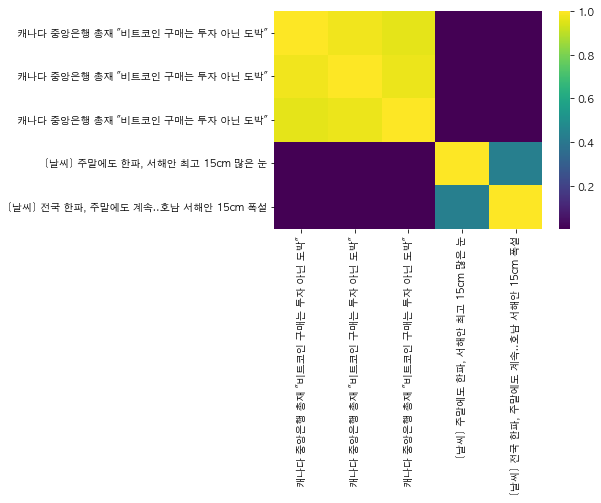

In [26]:
print(similarity.shape) #(5, 5)

sns.heatmap(similarity, xticklabels=titles, yticklabels=titles, cmap='viridis')
plt.show()